# Building a model to predict price of sales(dollars) made by the Iowa government.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import iplot
import datetime
import warnings

In [2]:
# Ignore warnings 
warnings.filterwarnings('ignore')

In [3]:
# Reading cleaned CSV file from analysis jupyter notebook
df=pd.read_csv("cleaned_Iowa_Liquor_Sales.csv")
df.head(5)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,County,Category,Category Name,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Profit (Dollars),date_without_time,month
0,INV-46142600002,04/03/2022,3842,BANCROFT LIQUOR STORE,107 N PORTLAND ST PO BX 222,BANCROFT,50517.0,KOSSUTH,1081200,CREAM LIQUEURS,...,1000,17.00,25.50,6,153.00,6.0,1.58,51.00,2022-04-03,Apr
1,INV-46142600006,04/03/2022,3842,BANCROFT LIQUOR STORE,107 N PORTLAND ST PO BX 222,BANCROFT,50517.0,KOSSUTH,1031100,AMERICAN VODKAS,...,1000,13.17,19.76,24,474.24,24.0,6.34,158.16,2022-04-03,Apr
2,INV-46142100001,04/03/2022,5941,PRIME MART - CEDAR FALLS,2728 CENTER ST,CEDAR FALLS,50613.0,BLACK HAWK,1012200,SCOTCH WHISKIES,...,750,150.00,225.00,2,450.00,1.5,0.39,150.00,2022-04-03,Apr
3,INV-46142400009,04/03/2022,4129,CYCLONE LIQUORS,626 LINCOLN WAY,AMES,50010.0,STORY,1032100,IMPORTED VODKAS,...,1000,15.16,22.74,60,1364.40,60.0,15.85,454.80,2022-04-03,Apr
4,INV-46142400014,04/03/2022,4129,CYCLONE LIQUORS,626 LINCOLN WAY,AMES,50010.0,STORY,1041100,AMERICAN DRY GINS,...,1000,7.33,11.00,4,44.00,4.0,1.05,14.68,2022-04-03,Apr


In [4]:
# Getting info of cleaned data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320163 entries, 0 to 1320162
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Invoice/Item Number    1320163 non-null  object 
 1   Date                   1320163 non-null  object 
 2   Store Number           1320163 non-null  int64  
 3   Store Name             1320163 non-null  object 
 4   Address                1320163 non-null  object 
 5   City                   1320163 non-null  object 
 6   Zip Code               1320163 non-null  float64
 7   County                 1320163 non-null  object 
 8   Category               1320163 non-null  int64  
 9   Category Name          1320163 non-null  object 
 10  Vendor Number          1320163 non-null  int64  
 11  Vendor Name            1320163 non-null  object 
 12  Item Number            1320163 non-null  int64  
 13  Item Description       1320163 non-null  object 
 14  Pack              

In [5]:
# Droping unnecessary columns
df.drop(['Invoice/Item Number','Date','Store Number','Address','City','Zip Code','County','Category','Vendor Number','Item Number','Item Description','date_without_time','month','Volume Sold (Liters)','Store Name'],axis=1,inplace=True)

In [6]:
# checking whether the columns are dropped or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320163 entries, 0 to 1320162
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Category Name          1320163 non-null  object 
 1   Vendor Name            1320163 non-null  object 
 2   Pack                   1320163 non-null  int64  
 3   Bottle Volume (ml)     1320163 non-null  int64  
 4   State Bottle Cost      1320163 non-null  float64
 5   State Bottle Retail    1320163 non-null  float64
 6   Bottles Sold           1320163 non-null  int64  
 7   Sale (Dollars)         1320163 non-null  float64
 8   Volume Sold (Gallons)  1320163 non-null  float64
 9   Profit (Dollars)       1320163 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 100.7+ MB


## Applying One Hot Encoding by selecting the top 10 important features

#### If I only used one hot encoding, there would be many columns. So, I am selecting the top 10 important features from each category column.

In [7]:
# Getting dummies for categorical features (applying one hot encoding)
df["Category Name"].value_counts().sort_values(ascending=False).head(20)

AMERICAN VODKAS                   205351
CANADIAN WHISKIES                 114471
STRAIGHT BOURBON WHISKIES          93763
WHISKEY LIQUEUR                    77252
AMERICAN FLAVORED VODKA            70325
100% AGAVE TEQUILA                 55143
SPICED RUM                         54065
BLENDED WHISKIES                   50163
AMERICAN SCHNAPPS                  42191
TENNESSEE WHISKIES                 36388
TEMPORARY & SPECIALTY PACKAGES     35514
AMERICAN CORDIALS & LIQUEUR        34368
IMPORTED VODKAS                    33228
MIXTO TEQUILA                      30121
AMERICAN BRANDIES                  29563
FLAVORED RUM                       29471
COCKTAILS /RTD                     26692
IMPORTED BRANDIES                  26569
WHITE RUM                          25928
CREAM LIQUEURS                     22069
Name: Category Name, dtype: int64

In [8]:
def one_hot_top_x(df1, variable, top_x_labels):
    for label in top_x_labels:
        df1[variable+'_'+label] = np.where(df[variable]==label, 1, 0)

In [9]:
top_10 = [x for x in df["Category Name"].value_counts().sort_values(ascending=False).head(10).index]
one_hot_top_x(df, 'Category Name', top_10)
df.head()

,Category Name,Vendor Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Gallons),Profit (Dollars),Category Name_AMERICAN VODKAS,Category Name_CANADIAN WHISKIES,Category Name_STRAIGHT BOURBON WHISKIES,Category Name_WHISKEY LIQUEUR,Category Name_AMERICAN FLAVORED VODKA,Category Name_100% AGAVE TEQUILA,Category Name_SPICED RUM,Category Name_BLENDED WHISKIES,Category Name_AMERICAN SCHNAPPS,Category Name_TENNESSEE WHISKIES
0,CREAM LIQUEURS,E & J GALLO WINERY,6,1000,17.00,25.50,6,153.00,1.58,51.00,0,0,0,0,0,0,0,0,0,0
1,AMERICAN VODKAS,FIFTH GENERATION INC,12,1000,13.17,19.76,24,474.24,6.34,158.16,1,0,0,0,0,0,0,0,0,0
2,SCOTCH WHISKIES,WILLIAM GRANT & SONS INC,3,750,150.00,225.00,2,450.00,0.39,150.00,0,0,0,0,0,0,0,0,0,0
3,IMPORTED VODKAS,DIAGEO AMERICAS,12,1000,15.16,22.74,60,1364.40,15.85,454.80,0,0,0,0,0,0,0,0,0,0
4,AMERICAN DRY GINS,E & J GALLO WINERY,12,1000,7.33,11.00,4,44.00,1.05,14.68,0,0,0,0,0,0,0,0,0,0


In [10]:
df["Vendor Name"].value_counts().sort_values(ascending=False).head(20)

SAZERAC COMPANY  INC                                          208658
DIAGEO AMERICAS                                               206770
JIM BEAM BRANDS                                               110711
HEAVEN HILL BRANDS                                            101643
LUXCO INC                                                      84781
PERNOD RICARD USA                                              62652
PROXIMO                                                        59139
BACARDI USA INC                                                56455
E & J GALLO WINERY                                             50514
FIFTH GENERATION INC                                           39776
BROWN FORMAN CORP.                                             38323
MCCORMICK DISTILLING CO.                                       28204
PHILLIPS BEVERAGE                                              24931
LAIRD & COMPANY                                                22549
OLE SMOKY DISTILLERY LLC          

In [11]:
top_10 = [x for x in df["Vendor Name"].value_counts().sort_values(ascending=False).head(10).index]
one_hot_top_x(df, 'Vendor Name', top_10)
df.head()

,Category Name,Vendor Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Gallons),Profit (Dollars),...,Vendor Name_SAZERAC COMPANY INC,Vendor Name_DIAGEO AMERICAS,Vendor Name_JIM BEAM BRANDS,Vendor Name_HEAVEN HILL BRANDS,Vendor Name_LUXCO INC,Vendor Name_PERNOD RICARD USA,Vendor Name_PROXIMO,Vendor Name_BACARDI USA INC,Vendor Name_E & J GALLO WINERY,Vendor Name_FIFTH GENERATION INC
0,CREAM LIQUEURS,E & J GALLO WINERY,6,1000,17.00,25.50,6,153.00,1.58,51.00,...,0,0,0,0,0,0,0,0,1,0
1,AMERICAN VODKAS,FIFTH GENERATION INC,12,1000,13.17,19.76,24,474.24,6.34,158.16,...,0,0,0,0,0,0,0,0,0,1
2,SCOTCH WHISKIES,WILLIAM GRANT & SONS INC,3,750,150.00,225.00,2,450.00,0.39,150.00,...,0,0,0,0,0,0,0,0,0,0
3,IMPORTED VODKAS,DIAGEO AMERICAS,12,1000,15.16,22.74,60,1364.40,15.85,454.80,...,0,1,0,0,0,0,0,0,0,0
4,AMERICAN DRY GINS,E & J GALLO WINERY,12,1000,7.33,11.00,4,44.00,1.05,14.68,...,0,0,0,0,0,0,0,0,1,0


In [12]:
df.drop(['Category Name',"Vendor Name"],axis=1,inplace=True)

In [13]:
# Seperating dependent and independent variables 
y1=df['Volume Sold (Gallons)']
y2=df['Sale (Dollars)']
y3=df['Profit (Dollars)']
df.drop(['Volume Sold (Gallons)','Sale (Dollars)','Profit (Dollars)'],axis=1,inplace=True)
X=df

## Scaling

In [14]:
# Importing libraries
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [15]:
# Applying column transform to apply scalling technique to selected columns
ct = make_column_transformer( 
          (make_pipeline(KNNImputer(), StandardScaler()),
          ["Pack","Bottle Volume (ml)","State Bottle Cost","State Bottle Retail","Bottles Sold"]),remainder="passthrough"
      )
X = ct.fit_transform(X)

## Train,Test and validation split

In [16]:
# Spliting the dataset into train, test and validation dataset
from sklearn.model_selection import train_test_split
X_train, X_rem, y2_train, y2_rem = train_test_split(X,y2, train_size=0.7,random_state=20)
X_valid, X_test, y2_valid, y2_test = train_test_split(X_rem,y2_rem, test_size=0.5,random_state=20)

## Modeling

In [17]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [18]:
# Importing librarues
from sklearn.linear_model import (LinearRegression, ElasticNetCV, RidgeCV)
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
import xgboost

In [19]:
# Collecting the different type of estimators to select best regression model
estimators = {
    "lr": LinearRegression(),
    "lassocv":LassoCV(),
    "ridge":RidgeCV(alphas=np.logspace(-3,1,100)),
    "elastic": ElasticNetCV(alphas=np.logspace(-3,2,100),l1_ratio=[.1, .5, .7, .9, .95, .99, 1]),
}

In [20]:
# Finding r2 score for all model by applying cross validation 
cv_results = {}
for nm, est in estimators.items():
  print(nm)
  cv_results[nm] = cross_validate(est, X_train, y2_train,scoring=('r2'), return_estimator=True, cv=10,verbose=2)

lr


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   1.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.0s
lassocv


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   11.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   8.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s


[CV] END .................................................... total time=   8.9s
[CV] END .................................................... total time=   9.1s
[CV] END .................................................... total time=   8.9s
[CV] END .................................................... total time=   8.9s
[CV] END .................................................... total time=   8.9s
[CV] END .................................................... total time=   9.1s
[CV] END .................................................... total time=   9.0s
[CV] END .................................................... total time=   8.9s
[CV] END .................................................... total time=   8.8s
ridge


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  25.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.2s remaining:    0.0s


[CV] END .................................................... total time=  24.7s
[CV] END .................................................... total time=  24.8s
[CV] END .................................................... total time=  25.4s
[CV] END .................................................... total time=  24.6s
[CV] END .................................................... total time=  26.2s
[CV] END .................................................... total time=  24.9s
[CV] END .................................................... total time=  24.6s
[CV] END .................................................... total time=  24.8s
[CV] END .................................................... total time=  24.7s
elastic


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time= 2.2min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s


[CV] END .................................................... total time= 2.3min
[CV] END .................................................... total time= 2.2min
[CV] END .................................................... total time=  55.0s
[CV] END .................................................... total time=  54.2s
[CV] END .................................................... total time=  54.2s
[CV] END .................................................... total time=  54.3s
[CV] END .................................................... total time= 2.2min
[CV] END .................................................... total time= 2.2min
[CV] END .................................................... total time= 2.2min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 16.7min finished


In [21]:
# Getting mean of all test scores in cross validation
{nm: np.mean(scr["test_score"]) for nm, scr in cv_results.items()}

{'lr': 0.6758622555478777,
 'lassocv': 0.6756529237675689,
 'ridge': 0.675871136218537,
 'elastic': 0.675871786190023}

In [22]:
# Predicting the target value for test data set
y2_pred = cross_val_predict(estimators['lr'],  X_test, y2_test)

<AxesSubplot:xlabel='Sale (Dollars)', ylabel='Density'>

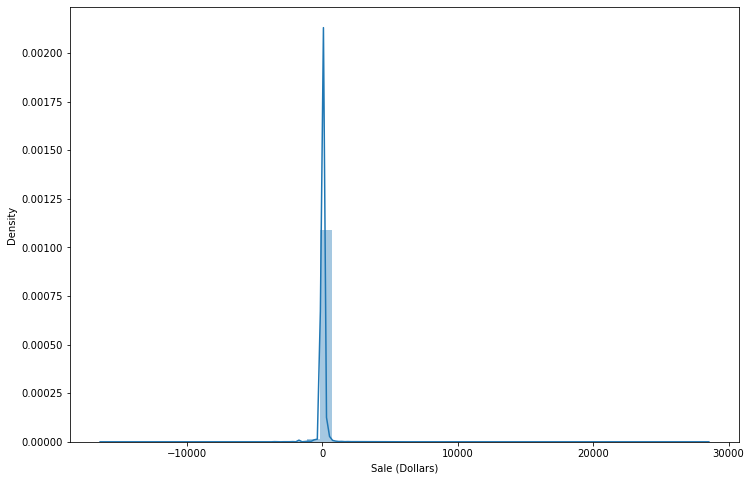

In [23]:
# Ploting the histogram residual plot for test data
import seaborn as sns
fig,ax=plt.subplots(figsize=(12,8))
delta_y2 = y2_test - y2_pred
sns.distplot(delta_y2,bins=50)

In [24]:
# Performing  linear regression model 
rmod = LinearRegression()
rmod.fit(X_train, y2_train)
y_pred = rmod.predict(X_train)

In [25]:
# Finding r2 score for train, test and validation datasets 
from sklearn.metrics import r2_score
print("Train r2 score :",r2_score(y2_train,y_pred))
y_pred1 = rmod.predict(X_test)
from sklearn.metrics import r2_score
print("Test r2 score :",r2_score(y2_test,y_pred1))
y_pred2 = rmod.predict(X_valid)
from sklearn.metrics import r2_score
print("validation set r2 score :",r2_score(y2_valid,y_pred2))

Train r2 score : 0.686303569471463
Test r2 score : 0.6533095643362852
validation set r2 score : 0.7011880807386421


In [26]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

### Hyper parameter tunning for Xgboost Regressor

In [31]:
# Finding the best hyperparameter for Xgboost regressor using Gride Search CV
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5, 7, 10],
                'min_child_weight': [1, 3, 5],
                'subsample': [0.5, 0.7],
                'colsample_bytree': [0.5, 0.7],
                'n_estimators' : [100, 200, 500],
                'objective': ['reg:squarederror']
        }

    xgb_model = XGBRegressor()

    hyper_tuning_xgb = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'r2',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1)

    hyper_tuning_xgb.fit(X_train,y_train)

    return hyper_tuning_xgb.best_params_

In [32]:
from sklearn.model_selection import GridSearchCV
hyperParameterTuning(X_train[:3000,:], y2_train[:3000])

Fitting 2 folds for each of 288 candidates, totalling 576 fits


{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 200,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

### Hyper parameter tunning for Random Forest Regressor

In [33]:
# Finding the best hyperparameter for random forest regressor using randomized Search CV
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {
                'n_estimators': n_estimators,'max_features': max_features,
               'max_depth': max_depth,'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }

In [34]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

In [35]:
from sklearn.model_selection import RandomizedSearchCV
hyper_tuning_rf = RandomizedSearchCV(estimator = rf_model,param_distributions = random_grid,
               n_iter = 100, cv = 2, verbose=2, random_state=35, n_jobs = -1)

In [36]:
# Fitting the parameter into tunning model
hyper_tuning_rf.fit(X_train[:3000,:], y2_train[:3000])

Fitting 2 folds for each of 100 candidates, totalling 200 fits


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [37]:
print ('Random grid: ', hyper_tuning_rf, '\n')
# print the best parameters
print ('Best Parameters: ', hyper_tuning_rf.best_params_, ' \n')

Random grid:  RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2) 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True}  



### Finding best model Among clasification Regressors

In [38]:
# Applying the classification regressors to find any model perform better than normal regressors
cls_estimators = {
    
    "Dtr": DecisionTreeRegressor( max_depth= None, max_features = 'auto', max_leaf_nodes = None,
                                 splitter = 'best'),
    "xgb":XGBRegressor(n_estimators=200, objective="reg:squarederror",max_depth=5,
                       learning_rate=0.1,min_child_weight=5,subsample=0.7,
                       reg_lambda=3),  
    "RFR": RandomForestRegressor(n_estimators= 100, min_samples_split=2,
                                 min_samples_leaf= 1,max_features= 'auto', max_depth=120,
                                 bootstrap=True)
    }

In [39]:
# Finding r2 score for all model by applying cross validation 
cv_results_cls_reg = {}
for nm, est in cls_estimators .items():
  print(nm)
  cv_results_cls_reg[nm] = cross_validate(est, X_train, y2_train,scoring=('r2'), return_estimator=True, cv=5,verbose=2)

Dtr


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   4.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV] END .................................................... total time=   5.1s
[CV] END .................................................... total time=   4.6s
[CV] END .................................................... total time=   5.1s
[CV] END .................................................... total time=   4.6s
xgb


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time= 1.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV] END .................................................... total time= 1.3min
[CV] END .................................................... total time= 1.3min
[CV] END .................................................... total time= 1.3min
[CV] END .................................................... total time= 1.3min
RFR


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time= 5.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.3min remaining:    0.0s


[CV] END .................................................... total time= 5.4min
[CV] END .................................................... total time= 5.1min
[CV] END .................................................... total time= 5.3min
[CV] END .................................................... total time= 5.2min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 26.3min finished


In [40]:
# Getting mean of all test scores in cross validation
{nm: np.mean(scr["test_score"]) for nm, scr in cv_results_cls_reg.items()}

{'Dtr': 0.9480259011006252,
 'xgb': 0.9737602246038207,
 'RFR': 0.9700650318677901}

#### Among all models xgboost is performing very well with r2 score of 0.9737. Let's analyize this model in detail

In [45]:
# we already find the hyperparameters, I am reusing same parameters
xgb_reg_model=XGBRegressor(n_estimators=500, objective="reg:squarederror",max_depth=5,
                       learning_rate=0.1,min_child_weight=5,subsample=0.5,
                       reg_lambda=3)

In [47]:
# Fitting into model
xgb_reg_model.fit(X_train, y2_train)
y_pred = xgb_reg_model.predict(X_train)

In [48]:
# Finding r2 score for train, test and validation datasets 
from sklearn.metrics import r2_score
print("Train r2 score :",r2_score(y2_train,y_pred))
y_pred1 = xgb_reg_model.predict(X_test)
from sklearn.metrics import r2_score
print("Test r2 score :",r2_score(y2_test,y_pred1))
y_pred2 = xgb_reg_model.predict(X_valid)
from sklearn.metrics import r2_score
print("validation set r2 score :",r2_score(y2_valid,y_pred2))

Train r2 score : 0.9853017459545271
Test r2 score : 0.9970258563920585
validation set r2 score : 0.995787863911886


<AxesSubplot:xlabel='Sale (Dollars)', ylabel='Density'>

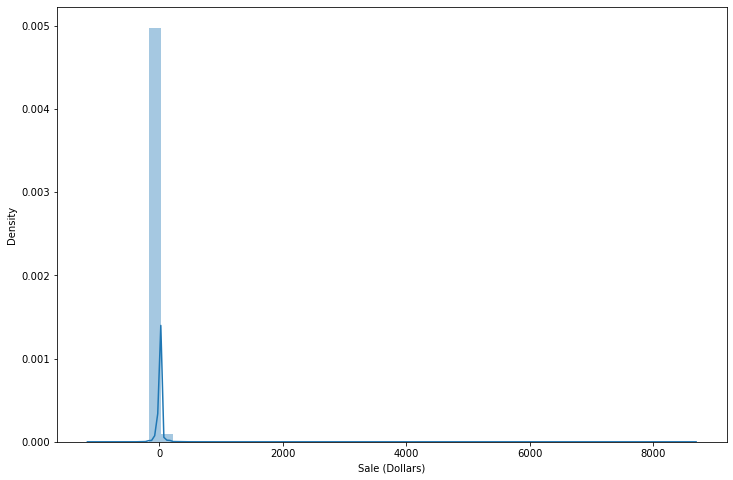

In [49]:
# Ploting the histogram residual plot for test data
import seaborn as sns
fig,ax=plt.subplots(figsize=(12,8))
delta_y2 = y2_test - y_pred1
sns.distplot(delta_y2,bins=50)

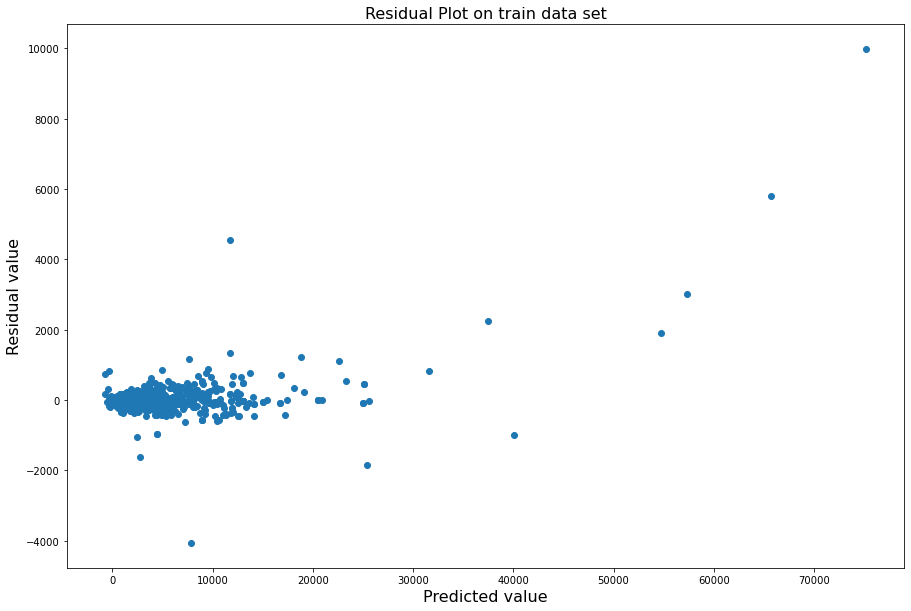

In [50]:
#ploting the residual plot on validation data with the help of scatter plot
plt.figure(figsize=[15,10])
plt.scatter(y_pred2,y_pred2-y2_valid)
plt.xlabel("Predicted value",fontsize=16)
plt.ylabel("Residual value",fontsize=16)
plt.title("Residual Plot on train data set",fontsize=16)
plt.show()

In [51]:
from sklearn import metrics
print("Mean absolute error(MAE) for test data set is ",metrics.mean_absolute_error(y2_test,y_pred1))
print("Mean squared error(MSE) for test data set is ",metrics.mean_squared_error(y2_test,y_pred1))
print("Root mean absolute error(RMSE) for test data set is ",np.sqrt(metrics.mean_squared_error(y2_test,y_pred1)))

Mean absolute error(MAE) for test data set is  5.649905023195989
Mean squared error(MSE) for test data set is  767.295472845152
Root mean absolute error(RMSE) for test data set is  27.70009878764247
